In [63]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [64]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

## Question one and two BELOW:

In [3]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


In [4]:
rr_2016.tail()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 05:29:16+00:00,-33.416432,151.222722,198.4,24.0,0.0,0.0,172.0,0.008624,0.0,31.045284,1.0
2016-05-14 05:29:17+00:00,-33.416497,151.222764,198.4,24.0,0.0,0.0,168.0,0.008212,0.0,29.562739,1.0
2016-05-14 05:29:18+00:00,-33.416563,151.222807,198.4,24.0,0.0,0.0,164.0,0.008354,0.0,30.073849,1.0
2016-05-14 05:29:19+00:00,-33.416627,151.222852,198.4,24.0,0.0,0.0,161.0,0.008252,0.0,29.705591,1.0
2016-05-14 05:29:21+00:00,-33.416753,151.222934,198.0,24.0,0.0,0.0,158.0,0.015944,-0.4,28.699591,2.0


In [5]:
total_distance2016_r=rr_2016['distance'].sum()
speed_2016rr=rr_2016['speed'].mean()
print("The total distance for 2016 road race is: ",total_distance2016_r,"km")
print("The average speed for 2016 road race is: ",speed_2016rr,"km/h")

The total distance for 2016 road race is:  49.04858574628638 km
The average speed for 2016 road race is:  34.93308475482947 km/h


<AxesSubplot:xlabel='time of the ride', ylabel='speed  (km/h)'>

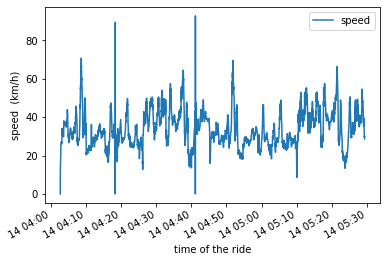

In [6]:
rr_2016.plot(xlabel='time of the ride',ylabel='speed  (km/h)',y="speed")

In [7]:
rr_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2821.000000
mean,-33.368017,151.225527,232.404465,25.280652,0.0,65.987952,158.394401,0.017381,-0.003756,34.933085,1.843318
std,0.028329,0.006014,29.725934,1.348746,0.0,34.425881,11.304588,0.015695,0.458872,10.738677,1.692364
min,-33.416753,151.211496,176.000000,24.000000,0.0,0.000000,102.000000,0.000000,-1.600000,0.000000,1.000000
25%,-33.393691,151.221912,209.450000,24.000000,0.0,68.000000,151.000000,0.007894,-0.400000,26.656312,1.000000
50%,-33.371820,151.227236,226.100000,25.000000,0.0,79.000000,158.000000,0.011794,0.000000,33.307339,1.000000
75%,-33.342269,151.230069,258.200000,26.000000,0.0,87.000000,166.000000,0.016899,0.400000,42.871885,2.000000
max,-33.316890,151.235131,295.800000,30.000000,0.0,117.000000,205.000000,0.076283,1.200000,92.749036,9.000000


In [8]:
print("The range of speed in 2016 road race is: ",rr_2016.describe()['speed']['max'], " km/h")

The range of speed in 2016 road race is:  92.74903649913952  km/h


Overall, the 2016 road race has around 49 km of distance in total. The average speed of the road race is around 34.9 km/h and the race is completed in one hour and twenty-seven minutes. The heart rate of the rider is 102 at the beginning of the ride, but it increased to 158 at the end of the ride, which shows that the ride requires decent amount of energy from ride.

In [9]:
total_distance2019_r=rr_2019['distance'].sum()
speed_2019rr=rr_2019['speed'].mean()
print("The total distance for 2019 road race is: ",total_distance2019_r,"km")
print("The average speed for 2019 road race is: ",speed_2019rr,"km/h")

The total distance for 2019 road race is:  51.78913253596059 km
The average speed for 2019 road race is:  33.87986137188044 km/h


In [10]:
print("The range of speed in 2019 road race is: ",rr_2019.describe()['speed']['max'], " km/h")

The range of speed in 2019 road race is:  70.37046868335639  km/h


<AxesSubplot:xlabel='time of the ride', ylabel='speed  (km/h)'>

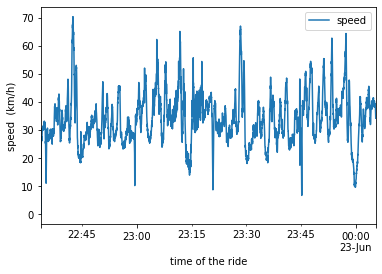

In [11]:
rr_2019.plot(xlabel='time of the ride',ylabel='speed  (km/h)',y="speed")

In [12]:
rr_2019.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5502.0
mean,-33.371644,151.225232,243.243576,5.997819,213.617845,70.004906,138.998546,0.009411,0.000254,33.879861,1.0
std,0.030592,0.006142,30.197981,0.806414,144.123686,29.869938,16.184123,0.002459,0.347322,8.853503,0.0
min,-33.422174,151.211507,185.200000,0.000000,0.000000,0.000000,71.000000,0.000000,-2.000000,0.000000,1.0
25%,-33.396939,151.221591,219.600000,5.000000,104.000000,66.000000,129.000000,0.007839,-0.200000,28.219962,1.0
50%,-33.373835,151.227064,236.000000,6.000000,212.000000,81.000000,142.000000,0.009178,0.000000,33.041360,1.0
75%,-33.344994,151.229977,269.600000,7.000000,308.000000,89.000000,152.000000,0.010733,0.200000,38.640026,1.0
max,-33.316865,151.235094,310.400000,7.000000,785.000000,120.000000,170.000000,0.019547,1.000000,70.370469,1.0


In [13]:
rr_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0


In [14]:
rr_2019.tail()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-23 00:05:23+00:00,-33.415728,151.222289,216.6,7.0,28.0,23.0,153.0,0.010218,-0.2,36.786246,1.0
2019-06-23 00:05:24+00:00,-33.415808,151.222340,216.6,7.0,13.0,10.0,153.0,0.010077,0.0,36.275739,1.0
2019-06-23 00:05:25+00:00,-33.415885,151.222391,216.6,7.0,0.0,0.0,152.0,0.009783,0.0,35.220093,1.0
2019-06-23 00:05:26+00:00,-33.415962,151.222440,216.6,7.0,0.0,0.0,152.0,0.009695,0.0,34.901660,1.0
2019-06-23 00:05:27+00:00,-33.416037,151.222489,216.4,7.0,0.0,0.0,151.0,0.009499,-0.2,34.196667,1.0


Overall, the 2019 road race has around 52 km of distance in total. The average speed of the road race is around 34 km/h, and the race is completed in one hour and thirty-two minutes. The heart rate of the rider is 71 at the beginning of the ride, but it increased to 151 at the end of the ride, which shows that massive amount of energy was spent by the rider during the ride.

In [15]:
tt_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0


In [16]:
tt_2016.tail()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:50:39+00:00,-33.415476,151.221628,116.0,11.0,0.0,100.0,163.0,0.024989,0.0,44.980624,2.0
2016-07-02 23:50:41+00:00,-33.415667,151.221757,115.4,11.0,0.0,99.0,163.0,0.024381,-0.6,43.885165,2.0
2016-07-02 23:50:45+00:00,-33.416048,151.222013,115.4,11.0,0.0,0.0,162.0,0.048573,0.0,43.716017,4.0
2016-07-02 23:51:16+00:00,-33.418333,151.223478,108.0,11.0,0.0,64.0,143.0,0.288175,-7.4,33.465472,31.0
2016-07-02 23:51:17+00:00,-33.418368,151.223494,108.0,11.0,0.0,64.0,143.0,0.004166,0.0,14.995824,1.0


In [17]:
tt_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,1541.000000,1541.000000,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1540.000000
mean,-33.368105,151.225411,139.068657,10.953277,0.0,83.277093,170.939650,0.016095,-0.002466,33.529963,1.783766
std,0.028055,0.006166,30.301132,0.657937,0.0,21.169978,23.392548,0.015897,0.515343,11.519681,1.822713
min,-33.418368,151.211206,85.000000,10.000000,0.0,0.000000,100.000000,0.000000,-7.400000,0.000000,1.000000
25%,-33.393795,151.221870,116.200000,11.000000,0.0,77.000000,157.000000,0.007622,-0.400000,25.068271,1.000000
50%,-33.370613,151.227333,134.000000,11.000000,0.0,86.000000,161.000000,0.010974,0.000000,32.840076,1.000000
75%,-33.343332,151.230072,165.400000,11.000000,0.0,96.000000,180.000000,0.015960,0.400000,41.470522,2.000000
max,-33.316888,151.235137,202.600000,13.000000,0.0,118.000000,251.000000,0.288175,2.400000,162.505764,31.000000


In [18]:
print("the average speed of 2016 time trial is: ",tt_2016['speed'].mean()," km/h.")
print("the total distance travelled in the 2016 time trial is ",tt_2016['distance'].sum()," km.")

the average speed of 2016 time trial is:  33.52996304869014  km/h.
the total distance travelled in the 2016 time trial is  24.80288703130808  km.


In [19]:
print("The range of speed in 2016 time trial is: ",tt_2016.describe()['speed']['max'], " km/h")

The range of speed in 2016 time trial is:  162.50576377606754  km/h


<AxesSubplot:xlabel='time of the ride', ylabel='speed  (km/h)'>

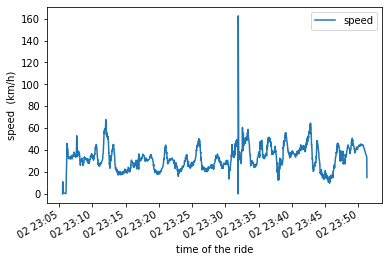

In [20]:
tt_2016.plot(xlabel='time of the ride',ylabel='speed  (km/h)',y="speed")

Overall, the 2016-time trial has around 25 km of distance in total. The average speed of the road race is around 33.5 km/h, and the race is completed in one hour and forty-six minutes. 

## Since the average speed of 2016 time trial is slower than the 2016 road race, therefore the time trial is slower than the road race.

In [21]:
tt_2019.head()


,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0


In [22]:
tt_2019.tail()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-01 23:39:05+00:00,-33.415270,151.221994,220.8,10.0,335.0,101.0,166.0,0.012323,-0.2,44.363507,1.0
2019-06-01 23:39:06+00:00,-33.415367,151.222056,220.8,10.0,350.0,101.0,166.0,0.012225,0.0,44.009916,1.0
2019-06-01 23:39:07+00:00,-33.415462,151.222122,220.6,10.0,273.0,101.0,166.0,0.012211,-0.2,43.960218,1.0
2019-06-01 23:39:08+00:00,-33.415555,151.222189,220.4,10.0,210.0,99.0,166.0,0.012067,-0.2,43.440736,1.0
2019-06-01 23:39:09+00:00,-33.415648,151.222255,220.4,10.0,154.0,73.0,166.0,0.012019,0.0,43.269479,1.0


In [23]:
tt_2019.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2654.0
mean,-33.368391,151.225397,250.435104,10.194350,257.566855,89.979661,152.741243,0.009183,0.000377,33.057824,1.0
std,0.028682,0.006234,29.434104,0.833934,80.023555,17.543883,8.217632,0.002715,0.298628,9.773522,0.0
min,-33.415798,151.211507,195.800000,9.000000,0.000000,0.000000,88.000000,0.000000,-1.600000,0.000000,1.0
25%,-33.394910,151.221400,229.200000,10.000000,213.500000,88.000000,150.000000,0.007345,-0.200000,26.440757,1.0
50%,-33.370118,151.227363,243.800000,10.000000,264.000000,94.000000,153.000000,0.009228,0.000000,33.220108,1.0
75%,-33.343803,151.230040,276.200000,10.000000,308.000000,98.000000,158.000000,0.010913,0.200000,39.286242,1.0
max,-33.316882,151.235098,312.200000,13.000000,522.000000,111.000000,166.000000,0.017584,0.600000,63.300734,1.0


In [24]:
print("the average speed of 2019 time trial is: ",tt_2019['speed'].mean()," km/h.")
print("the total distance travelled in the 2019 time trial is ",tt_2019['distance'].sum()," km.")

the average speed of 2019 time trial is:  33.05782378815691  km/h.
the total distance travelled in the 2019 time trial is  24.38014504376575  km.


In [25]:
print("The range of speed in 2019 time trial is: ",tt_2019.describe()['speed']['max'], " km/h")

The range of speed in 2019 time trial is:  63.300734121945005  km/h


## Since the average speed of 2019 time trial is slower than the 2019 road race, therefore the time trial is slower than the road race.

<AxesSubplot:xlabel='time of the ride', ylabel='speed  (km/h)'>

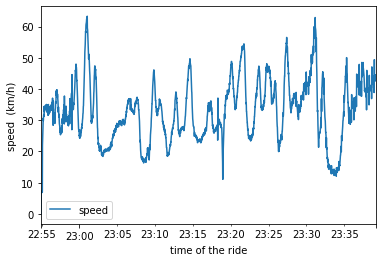

In [26]:
tt_2019.plot(xlabel='time of the ride',ylabel='speed  (km/h)',y="speed")

tt_2019.describe()

Overall, the 2019-time trial has around 24 km of distance in total. The average speed of the road race is around 33 km/h, and the race is completed in one hour and forty-four minutes. 

## QUESTION 3 
#### Compare the speeds achieved in the two time trials (three years apart). As well as looking at the averages, can you see where in the ride one or the other is faster.

Comparing the two time trials with each other, the 2016 time trial has reached a maximum speed of around 162km/h half way through the ride, which is significantly higher than the maximum speed of 2019 time trial, which is 63 km/h at the beginning of the ride.
Comparing the average speed of two time trials, 2016 time trial is slightly faster than the 2019 time trial.

 ## QUESTION FOUR
 From the elevation_gain field you can see whether the rider is climbing , descending or on the flat. Use this to calculate the average speeds in those three cases (climbing, flat or descending). Note that flat might not be zero elevation_gain but might allow for slight climbs and falls.

## Assume that slight climbs and falls include elevation change of within ±0.2 from 0 elevation change, which will be included in the case of the rider riding on the Flat.

### FOR time trial in 2016：

In [27]:
tt2016Climbing=tt_2016[tt_2016['elevation_gain']>0.2]
tt2016Flat= tt_2016.drop( tt_2016.index[((tt_2016['elevation_gain'] >=0.2) & (tt_2016['elevation_gain'] <= -0.2))] )
tt2016Descending=tt_2016[tt_2016['elevation_gain']<-0.2]


In [28]:
tt2016Flat


,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:50:39+00:00,-33.415476,151.221628,116.0,11.0,0.0,100.0,163.0,0.024989,0.0,44.980624,2.0
2016-07-02 23:50:41+00:00,-33.415667,151.221757,115.4,11.0,0.0,99.0,163.0,0.024381,-0.6,43.885165,2.0
2016-07-02 23:50:45+00:00,-33.416048,151.222013,115.4,11.0,0.0,0.0,162.0,0.048573,0.0,43.716017,4.0
2016-07-02 23:51:16+00:00,-33.418333,151.223478,108.0,11.0,0.0,64.0,143.0,0.288175,-7.4,33.465472,31.0


In [29]:
tt2016Climbing

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:06:48+00:00,-33.412495,151.220537,112.6,13.0,0.0,97.0,173.0,0.009495,0.8,34.182414,1.0
2016-07-02 23:06:52+00:00,-33.412211,151.220313,113.2,13.0,0.0,98.0,186.0,0.009587,0.6,34.512509,1.0
2016-07-02 23:06:53+00:00,-33.412138,151.220262,113.6,13.0,0.0,98.0,193.0,0.009397,0.4,33.828015,1.0
2016-07-02 23:06:54+00:00,-33.412066,151.220207,114.0,13.0,0.0,97.0,200.0,0.009495,0.4,34.182463,1.0
2016-07-02 23:07:29+00:00,-33.409753,151.217790,114.4,13.0,0.0,89.0,213.0,0.058192,0.4,34.915328,6.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:48:01+00:00,-33.401264,151.211338,127.0,11.0,0.0,88.0,158.0,0.010015,0.4,36.055360,1.0
2016-07-02 23:49:30+00:00,-33.409343,151.216622,114.6,11.0,0.0,85.0,155.0,0.020939,0.6,37.689956,2.0
2016-07-02 23:49:44+00:00,-33.410454,151.217725,115.6,11.0,0.0,95.0,155.0,0.059439,1.0,42.796247,5.0
2016-07-02 23:49:53+00:00,-33.411131,151.218476,116.0,11.0,0.0,94.0,156.0,0.011273,0.4,40.582157,1.0


In [30]:
tt2016Descending

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:07:57+00:00,-33.407552,151.216002,115.6,12.0,0.0,104.0,232.0,0.030833,-0.4,36.999543,3.0
2016-07-02 23:08:02+00:00,-33.407158,151.215713,115.2,12.0,0.0,100.0,232.0,0.020674,-0.4,37.212841,2.0
2016-07-02 23:08:06+00:00,-33.406905,151.215463,114.8,12.0,0.0,93.0,232.0,0.036468,-0.4,32.821483,4.0
2016-07-02 23:08:11+00:00,-33.406627,151.215196,114.4,12.0,0.0,86.0,225.0,0.007243,-0.4,26.076127,1.0
2016-07-02 23:09:24+00:00,-33.401750,151.211960,126.0,12.0,0.0,83.0,216.0,0.008261,-0.2,29.741019,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:49:10+00:00,-33.407493,151.215559,115.4,11.0,0.0,100.0,157.0,0.013371,-1.2,48.135930,1.0
2016-07-02 23:49:11+00:00,-33.407588,151.215627,114.0,11.0,0.0,99.0,157.0,0.012306,-1.4,44.300282,1.0
2016-07-02 23:50:32+00:00,-33.414787,151.221189,116.0,11.0,0.0,99.0,162.0,0.012354,-0.6,44.474300,1.0
2016-07-02 23:50:41+00:00,-33.415667,151.221757,115.4,11.0,0.0,99.0,163.0,0.024381,-0.6,43.885165,2.0


In [31]:
tt2016Climbing['speed'].mean()

24.582851769382092

In [32]:
tt2016Flat['speed'].mean()

33.52996304869014

In [33]:
tt2016Descending['speed'].mean()

44.8804796905693

In [34]:
print("The average speed of climbing in 2016 time trial is ",tt2016Climbing['speed'].mean(),"km/h, the average speed of riding on Flat is ", tt2016Flat['speed'].mean(),"km/h, and the average speed of descending is", tt2016Descending['speed'].mean() ,"km/h.")

The average speed of climbing in 2016 time trial is  24.582851769382092 km/h, the average speed of riding on Flat is  33.52996304869014 km/h, and the average speed of descending is 44.8804796905693 km/h.


### FOR road race in 2016：

In [35]:
rr2016Climbing=rr_2016[rr_2016['elevation_gain']>0.2]
rr2016Flat=rr_2016[(rr_2016.elevation_gain<=0.2)&(rr_2016.elevation_gain>=-0.2)]
rr2016Descending=rr_2016[rr_2016['elevation_gain']<-0.2]


In [36]:
rr2016Climbing['speed'].mean()

26.388560839499014

In [37]:
rr2016Flat['speed'].mean()

34.379636633038906

In [38]:
rr2016Descending['speed'].mean()

45.93384112592033

In [39]:
print("The average speed of climbing in 2016 road race is ",rr2016Climbing['speed'].mean(),"km/h, the average speed of riding on Flat is ", rr2016Flat['speed'].mean(),"km/h, and the average speed of descending is", rr2016Descending['speed'].mean() ,"km/h.")

The average speed of climbing in 2016 road race is  26.388560839499014 km/h, the average speed of riding on Flat is  34.379636633038906 km/h, and the average speed of descending is 45.93384112592033 km/h.


### FOR road race in 2019：

In [40]:
rr2019Climbing=rr_2019[rr_2019['elevation_gain']>0.2]
rr2019Flat=rr_2019[(rr_2019.elevation_gain<=0.2)&(rr_2019.elevation_gain>=-0.2)]
rr2019Descending=rr_2019[rr_2019['elevation_gain']<-0.2]

In [41]:
rr2019Climbing['speed'].mean()

28.32316190970727

In [42]:
rr2019Flat['speed'].mean()

32.75788906522152

In [43]:
rr2019Descending['speed'].mean()

43.55897340707479

In [44]:
print("The average speed of climbing in 2019 road race is ",rr2019Climbing['speed'].mean(),"km/h, the average speed of riding on Flat is ", rr2019Flat['speed'].mean(),"km/h, and the average speed of descending is", rr2019Descending['speed'].mean() ,"km/h.")

The average speed of climbing in 2019 road race is  28.32316190970727 km/h, the average speed of riding on Flat is  32.75788906522152 km/h, and the average speed of descending is 43.55897340707479 km/h.


### FOR time trial in 2019：

In [45]:
tt2019Climbing=tt_2019[tt_2019['elevation_gain']>0.2]
tt2019Flat=tt_2019[(tt_2019.elevation_gain<=0.2)&(tt_2019.elevation_gain>=-0.2)]
tt2019Descending=tt_2019[tt_2019['elevation_gain']<-0.2]

In [46]:
tt2019Climbing['speed'].mean()

25.065537322730965

In [47]:
tt2019Flat['speed'].mean()

32.12866414440054

In [48]:
tt2019Descending['speed'].mean()

45.06721060727631

In [56]:
print("The average speed of climbing in 2019 time trial is ",tt2019Climbing['speed'].mean(),"km/h, the average speed of riding on Flat is ", tt2019Flat['speed'].mean(),"km/h, and the average speed of descending is", tt2019Descending['speed'].mean() ,"km/h.")

The average speed of climbing in 2019 time trial is  25.065537322730965 km/h, the average speed of riding on Flat is  32.12866414440054 km/h, and the average speed of descending is 45.06721060727631 km/h.


## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





In [73]:
## create a new column and convert the speed from km/h to m/min, in order to obtain the distance the bike moves per rotation.
tt_2016['Development'] = ((( tt_2016['speed']*1000)/60) /(tt_2016['cadence']))
tt_2016['Development']

2016-07-02 23:05:32+00:00    3.186533
2016-07-02 23:06:06+00:00    4.290435
2016-07-02 23:06:08+00:00    6.072486
2016-07-02 23:06:11+00:00    8.932350
2016-07-02 23:06:14+00:00    6.498424
                               ...   
2016-07-02 23:50:23+00:00    7.603003
2016-07-02 23:50:31+00:00    7.573820
2016-07-02 23:50:32+00:00    7.487256
2016-07-02 23:50:39+00:00    7.496771
2016-07-02 23:50:41+00:00    7.388075
Name: Development, Length: 861, dtype: float64

In [74]:
tt_2016.loc[(tt_2016['Development'] >10) |(tt_2016['Development'] <2) , 'Development']=np.nan
tt_2016=tt_2016.dropna()
tt_2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,Development
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0,3.186533
2016-07-02 23:06:06+00:00,-33.415853,151.222023,111.8,13.0,0.0,97.0,107.0,0.013872,0.0,24.970333,2.0,4.290435
2016-07-02 23:06:08+00:00,-33.415700,151.221974,111.8,13.0,0.0,87.0,110.0,0.017610,0.0,31.698375,2.0,6.072486
2016-07-02 23:06:11+00:00,-33.415359,151.222040,111.8,13.0,0.0,86.0,113.0,0.038409,0.0,46.090924,3.0,8.932350
2016-07-02 23:06:14+00:00,-33.415096,151.221993,111.8,13.0,0.0,91.0,125.0,0.029568,0.0,35.481397,3.0,6.498424
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-02 23:50:23+00:00,-33.413907,151.220606,116.6,11.0,0.0,100.0,161.0,0.038015,0.0,45.618018,3.0,7.603003
2016-07-02 23:50:31+00:00,-33.414691,151.221122,116.6,11.0,0.0,99.0,162.0,0.037490,0.0,44.988492,3.0,7.573820
2016-07-02 23:50:32+00:00,-33.414787,151.221189,116.0,11.0,0.0,99.0,162.0,0.012354,-0.6,44.474300,1.0,7.487256
2016-07-02 23:50:39+00:00,-33.415476,151.221628,116.0,11.0,0.0,100.0,163.0,0.024989,0.0,44.980624,2.0,7.496771


In [84]:
## create a new column and convert the speed from km/h to m/min, in order to obtain the distance the bike moves per rotation.
rr_2016['Development'] = ((( rr_2016['speed']*1000)/60) /(rr_2016['cadence']))
rr_2016['Development']

2016-05-14 04:02:41+00:00    0.000000
2016-05-14 04:02:42+00:00    4.907092
2016-05-14 04:02:46+00:00    6.822931
2016-05-14 04:02:49+00:00    6.437546
2016-05-14 04:02:51+00:00    6.393775
                               ...   
2016-05-14 05:29:16+00:00         inf
2016-05-14 05:29:17+00:00         inf
2016-05-14 05:29:18+00:00         inf
2016-05-14 05:29:19+00:00         inf
2016-05-14 05:29:21+00:00         inf
Name: Development, Length: 2822, dtype: float64

In [85]:
## according to the question, the suitable range for Development is between 2 and 10, hence values outside of the range are converted all to null value
## After converting them to null values, all null values are dropped from the data frame, leaving values that's within the range
rr_2016.loc[(rr_2016['Development'] >10) |(rr_2016['Development'] <2) , 'Development']=np.nan
rr_2016=rr_2016.dropna()
rr_2016

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,Development
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0,4.907092
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,6.822931
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,6.437546
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,6.393775
2016-05-14 04:02:52+00:00,-33.415104,151.221976,208.6,29.0,0.0,62.0,109.0,0.007111,0.0,25.599979,1.0,6.881715
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 05:28:40+00:00,-33.413164,151.220644,200.8,24.0,0.0,104.0,169.0,0.026567,0.0,47.820718,2.0,7.663577
2016-05-14 05:28:44+00:00,-33.413602,151.220923,200.8,24.0,0.0,103.0,180.0,0.055160,0.0,49.643892,4.0,8.032992
2016-05-14 05:28:45+00:00,-33.413709,151.220986,200.8,24.0,0.0,102.0,180.0,0.013257,0.0,47.725651,1.0,7.798309
2016-05-14 05:28:54+00:00,-33.414636,151.221582,200.8,24.0,0.0,92.0,185.0,0.063469,0.0,45.697454,5.0,8.278524


In [92]:
## create a new column and convert the speed from km/h to m/min, in order to obtain the distance the bike moves per rotation.
tt_2019['Development'] = ((( tt_2019['speed']*1000)/60) /(tt_2019['cadence']))
tt_2019['Development']

2019-06-01 22:54:55+00:00         NaN
2019-06-01 22:54:56+00:00         inf
2019-06-01 22:54:57+00:00         inf
2019-06-01 22:54:58+00:00         inf
2019-06-01 22:54:59+00:00         inf
                               ...   
2019-06-01 23:39:05+00:00    7.320711
2019-06-01 23:39:06+00:00    7.262362
2019-06-01 23:39:07+00:00    7.254161
2019-06-01 23:39:08+00:00    7.313255
2019-06-01 23:39:09+00:00    9.878877
Name: Development, Length: 2655, dtype: float64

In [93]:
tt_2019.loc[(tt_2019['Development'] >10) |(tt_2019['Development'] <2) , 'Development']=np.nan
tt_2019=tt_2019.dropna()
tt_2019

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,Development
2019-06-01 22:55:05+00:00,-33.415641,151.221965,219.4,13.0,135.0,21.0,94.0,0.001909,0.0,6.871585,1.0,5.453639
2019-06-01 22:55:06+00:00,-33.415625,151.221956,219.4,13.0,522.0,53.0,96.0,0.001965,0.0,7.075658,1.0,2.225050
2019-06-01 22:55:07+00:00,-33.415575,151.221929,219.4,13.0,500.0,67.0,97.0,0.006098,0.0,21.954313,1.0,5.461272
2019-06-01 22:55:08+00:00,-33.415522,151.221900,219.4,13.0,493.0,74.0,99.0,0.006479,0.0,23.324036,1.0,5.253161
2019-06-01 22:55:09+00:00,-33.415464,151.221867,219.4,13.0,477.0,80.0,101.0,0.007140,0.0,25.702772,1.0,5.354744
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01 23:39:05+00:00,-33.415270,151.221994,220.8,10.0,335.0,101.0,166.0,0.012323,-0.2,44.363507,1.0,7.320711
2019-06-01 23:39:06+00:00,-33.415367,151.222056,220.8,10.0,350.0,101.0,166.0,0.012225,0.0,44.009916,1.0,7.262362
2019-06-01 23:39:07+00:00,-33.415462,151.222122,220.6,10.0,273.0,101.0,166.0,0.012211,-0.2,43.960218,1.0,7.254161
2019-06-01 23:39:08+00:00,-33.415555,151.222189,220.4,10.0,210.0,99.0,166.0,0.012067,-0.2,43.440736,1.0,7.313255


In [129]:
## create a new column and convert the speed from km/h to m/min, in order to obtain the distance the bike moves per rotation.
rr_2019['Development'] = ((( rr_2019['speed']*1000)/60) /(rr_2019['cadence']))
rr_2019['Development']

2019-06-22 22:33:46+00:00    4.839850
2019-06-22 22:33:47+00:00    5.936409
2019-06-22 22:33:48+00:00    6.491233
2019-06-22 22:33:49+00:00    6.512249
2019-06-22 22:33:50+00:00    6.544346
                               ...   
2019-06-23 00:05:16+00:00    6.891446
2019-06-23 00:05:17+00:00    6.874112
2019-06-23 00:05:18+00:00    6.846311
2019-06-23 00:05:19+00:00    6.818900
2019-06-23 00:05:20+00:00    7.271756
Name: Development, Length: 4307, dtype: float64

In [130]:
rr_2019.loc[(rr_2019['Development'] >10) |(rr_2019['Development'] <2) , 'Development']=np.nan
rr_2019=rr_2019.dropna()
rr_2019

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,Development
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0,4.839850
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0,5.936409
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0,6.491233
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0,6.512249
2019-06-22 22:33:50+00:00,-33.416837,151.223008,214.6,6.0,183.0,63.0,71.0,0.006872,-0.2,24.737627,1.0,6.544346
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-23 00:05:16+00:00,-33.415138,151.221910,217.6,7.0,271.0,94.0,153.0,0.010797,0.0,38.867755,1.0,6.891446
2019-06-23 00:05:17+00:00,-33.415224,151.221966,217.4,7.0,266.0,95.0,153.0,0.010884,-0.2,39.182439,1.0,6.874112
2019-06-23 00:05:18+00:00,-33.415310,151.222021,217.4,7.0,285.0,95.0,153.0,0.010840,0.0,39.023971,1.0,6.846311
2019-06-23 00:05:19+00:00,-33.415396,151.222075,217.2,7.0,280.0,95.0,153.0,0.010797,-0.2,38.867730,1.0,6.818900


# Compare the development value of two races in 2016 in one histogram

<AxesSubplot:>

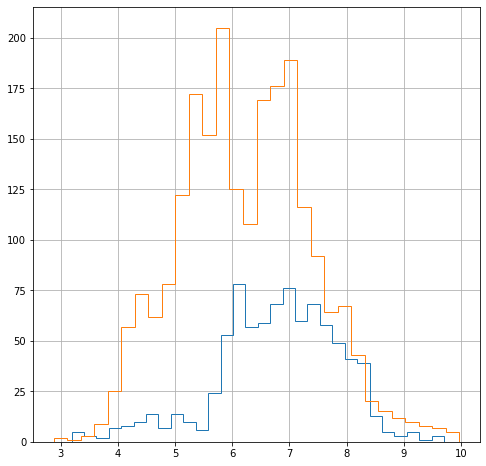

In [117]:
tt_2016['Development'].hist(density=0,histtype="step",bins=30,figsize=(8,8),)##blue
rr_2016['Development'].hist(density=0,histtype="step",bins=30,figsize=(8,8),)##orange

* by comparing the road race and time trial in 2016,it's evident that most of the Development values are between 5 to 7.5, which suggests that the rider is possibly riding on a relatively flat road most of the time. However, there are more counts of Development values in 2016 road race than tie trial, which suggests that the rider takes longer time and travelled significantly longer distance in road race.
In the time trial, the histogram is obviously left skewed, which shows that the Development values are relatively big, which demonstrates the evidence of a certain distance of downhill road in the race.

# Compare the development value of two races in 2019 in one histogram

<AxesSubplot:>

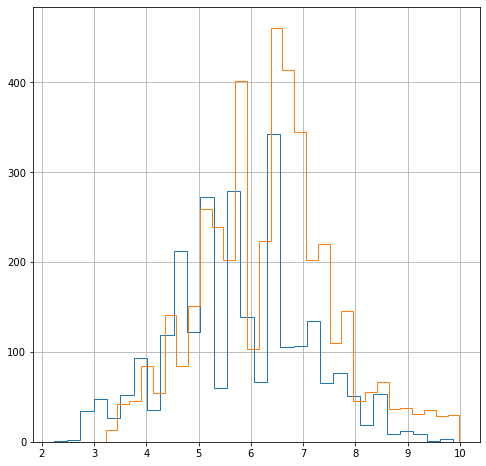

In [115]:
tt_2019['Development'].hist(density=0,histtype="step",bins=30,figsize=(8,8),)##blue
rr_2019['Development'].hist(density=0,histtype="step",bins=30,figsize=(8,8),)##orange

* By comparing the road race and time trial in 2019, it's evident that in 2019 road race, the histogram is slightly left skewed, which suggest that relatively high Development value is obtained from the ride. It suggests that there might be some gentle declines during the race. On the other hand, the 2019 time trial histogram is slightly right skewed. It's evident that some slightly small Development values are obtained, which sueests that there might be some gentle incline during the race. Overall, there are more counts of Development values in 2016 road race than tie trial, which shows that the rider takes longer time and travelled somewhat longer distance in road race.

# Compare the development of all four races in one histogram 

<AxesSubplot:>

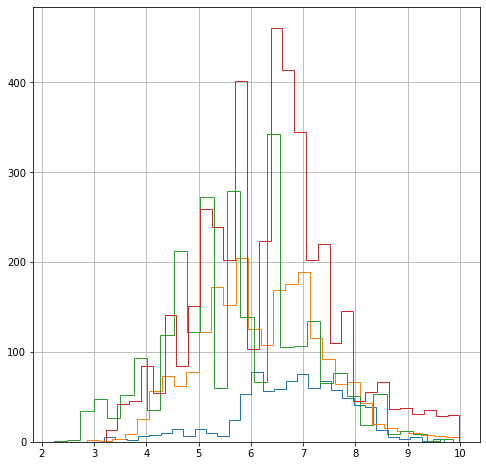

In [118]:
tt_2016['Development'].hist(density=0,histtype="step",bins=30,figsize=(8,8),)##blue
rr_2016['Development'].hist(density=0,histtype="step",bins=30,figsize=(8,8),)##orange

tt_2019['Development'].hist(density=0,histtype="step",bins=30,figsize=(8,8),)##green
rr_2019['Development'].hist(density=0,histtype="step",bins=30,figsize=(8,8),)##red

*Comparing all four races, it's evident that the 2019 road race has the highest count of Development values in the histogram, while the 2016 time trial has the lowest. It suggests that 2019 road race travels the longest distance and takes the longest time to complete. On the other hand, 2016 time trial has the shortes distance and takes the shortest time to complete.
Most of the Development values are around 5 to 7, except for 2016 time trial, where most of the Development values are around 6 to 8. This might be caused due to different choices of locations for the race. It might also be caused by the changes of cycling habits and muscle memory between 2016 and 2019, due to the improvement of cycling skill

# END :)